
<div class="alert alert-block alert-info">
   <h2 align="center"> <center><b> Reinforcement Learning Assignment 2 - Value Iteration </b></center></h2>

<br>
<center><font size="3">This notebook is a part of teaching material for ELEC-E8125</font></center>
<center><font size="3">Sep 4, 2023 - Nov 30, 2023</font></center>
<center><font size="3">Aalto University</font></center>
</div>


<a id='TOC'></a>

<div class="alert alert-block alert-success">
    
# Table of contents
* <a href='#1.'> 1. Introduction </a>
* <a href='#1.1'> 1.1 Learning Objectives </a>
* <a href='#1.2'> 1.2 Code Structure & Files </a>
* <a href='#2.'> 2. Sailor Gridworld </a>
* <a href='#3.'> 3. Value Iteration </a>
* <a href='#4.'> 4. Submitting </a>
* <a href='#4.1'> 4.1 Feedback </a>
* <a href='#5.'> References</a>


<a href='#T1'><b>Student Task 1.</b> Implementing Value Iteration (30 points) </a>\
<a href='#Q1'><b>Student Question 1.1</b> Reinforcement Learning Components (5 points) </a>\
<a href='#Q2'><b>Student Question 1.2</b> Value Analysis (5 points) </a>\
<a href='#Q3'><b>Student Question 1.3</b> Investigating Optimal Path (5 points) </a>\
<a href='#T2'><b>Student Task 2.</b> Investigating Convergence Properties (15 points) </a>\
<a href='#T3'><b>Student Task 3.</b> Number of Iterations Until Convergence (5 points) </a>\
<a href='#T4'><b>Student Task 4.</b> Evaluating the Policy (10 points) </a>\
<a href='#Q4'><b>Student Question 4.1</b> Relationship Between Discounted Return and the Value Function (10 points)</a>\
<a href='#Q5'><b>Student Question 4.2</b> Considering Unknown Environments (15 points) </a>

    
**Total Points:** 100


# 1. Introduction <a id='1.'></a>

In this exercise we look at how a simple method like value iteration can be used to find an optimal behaviour for a sailing gridworld environment. We further investigate the properties of value iteration and how environment definition can affect the behaviour learned by the agent.


## 1.1 Learning Objectives: <a id='1.1'></a>
- To understand the value iteration method and how it works
- To understand the importance of environment definition on behaviours


## 1.2 Code Structure & Files <a id='1.2'></a>

You don’t have to edit any other file other than ```ex2.ipynb``` to complete this exercise.

```
├───imgs                 # Images used in notebook
│   ex2.ipynb            # Main assignment file containing tasks
│   feedback.ipynb       # Please give feedback in here
│   sailing.py           # Defines the sailing gridworld environment
│   utils.py             # Contains save object function
```

# 2. Sailor Gridworld <a id='2.'></a>

Consider a sailor who managed to escape from a sinking ship, and now has to find the way to the nearest harbour. The sea is divided into a grid, with each grid cell corresponding to a state. Therefore, the state can be thought of as a two dimensional vector:

$$
s=\left(\begin{array}{c}
x \\
y \\
\end{array}\right)
$$

There are four actions available: moving left, right, up, and down. When the sailor reaches the harbour, the episode terminates and a reward of 10 is given. If the sailor hits the rocks, the episode terminates and a reward of −2 is given. On all other steps, the reward is 0. The environment is shown in Figure 1. 

<figure>
<img src="imgs/sailor1.png" width="400px">
<figcaption style="text-align: center"> Figure 1: The Sailor gridworld environment. Light blue squares represent the calm part of the sea, gray squares – the rocks, dark blue – the windy passage between the rocks. The green square in upper right corner is the target harbour. The current (in this picture also the initial) position of the sailor is denoted with a brown "boat"  </figcaption>
</figure>

The shortest way to the harbour goes through a narrow passage between rocks, which is known to have unpredictable heavy wind conditions. When moving in that area, the sailor can be carried an extra "square" in a random direction — that is, land in any of the squares adjacent to the desired target square. This is shown in Figure 2. 

<figure>
<img src="imgs/sailor2.png" width="700px">
<figcaption style="text-align: center"> Figure 2: Possible state transitions in windy passage when the issued action was to go left (a) or to go up (b). The sailor may end up in the square to the left (a) or up (b), as indicated by the green arrow. There is also a small $p_{wind}$ that the sailor will move for an additional unit in a random direction, as indicated by one of the yellow arrows. Therefore, in addition to moving one square in the target direction, it can (1) move two squares in the desired direction, (2) stay in place, or (3) be carried sideways to one of the squares on the diagonal. </figcaption>
</figure>

The sea around the passage is generally calm, but there is a low probability that the sailor will be carried in the direction perpendicular to where he was heading, as shown in Figure 3. 

<figure>
<img src="imgs/sailor3.png" width="300px">
<figcaption style="text-align: center"> Figure 3: Possible state transitions in calm water when the issued action was to go right. The sailor may end up in the square to the right, as indicated by the green arrow. There is a small chance $p_{calm}$ that the sailor will move in the perpendicular direction, as indicated by the yellow arrows.  </figcaption>
</figure>

All of these probabilities ($p_{calm}$ and $p_{wind}$) as well as the effects of the wind and the exact location of the harbour are perfectly known to the sailor. 

# 3. Value iteration <a id='3.'></a>

Value iteration is a method for computing an optimal MDP (Markov Decision Process) policy. We start with arbitrary initial state values and iteratively update our estimate of every state’s value by using Bellman equation as an update rule. A more detailed description, along with the exact equations, can be found in [1] Section 4.4.

<a id='T1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1.</b> Implementing Value Iteration (30 points) </h3> 

Implement value iteration for the sailor using the code below as a template, assuming the discount factor value $\gamma = 0.9$. In addition to the state values, compute the policy – path to the harbour, using computed state values. Run your implementation for 100 iterations. Render the values and policy after every iteration and observe how the values and policy are updated. Also, **run the program a few times and check if the sailor is able to reach the goal every time**. Ensure the values and policy are saved as a ```.pkl``` file using the ```u.save_object()``` cell below . This ```.pkl``` file is saved within the same directory as this file. **Attach an image of the estimated state values and policy into your submission.**

**Hint:** The environment contains a 3-D array (```env.transitions```) of shape $[n_x, n_y, n_a]$, which contains all possible state transitions. The transitions for state $(x, y)$ with action a can be accessed by ```env.transitions [x, y, a]``` . This will return a list of Python ***named-tuples*** Transition=$(next_state, reward, done, prob)$. The components of the named-tuple can be accessed as ```transition.state```, ```transition.reward```, ```transition.done```, ```transition.prob```. For example, ```env.transitions [3, 3, env.UP]``` would return a list of three possible state transitions:

```
(state=(3, 2), reward=0.0, done=0.0, prob=0.05),
(state=(3, 4), reward=0.0, done=0.0, prob=0.05),
(state=(4, 3), reward=0.0, done=0.0, prob=0.9)
```

which corresponds to moving to state (4, 3) with probability 0.9, or moving to states (3, 4) and (3, 2) with probability 0.05 for each. None of these transitions results in a reward or in terminating the episode (the second and third elements are zero). When the episode has already terminated, the next state will be set to ```None```.

**Caveat:** Pay extra attention to indices in the Bellman equation – specifically, where $V_k$ and where $V_{k−1}$ must be used.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
import numpy as np
from itertools import product

from sailing import SailingGridworld
import utils as u

from IPython.display import Image

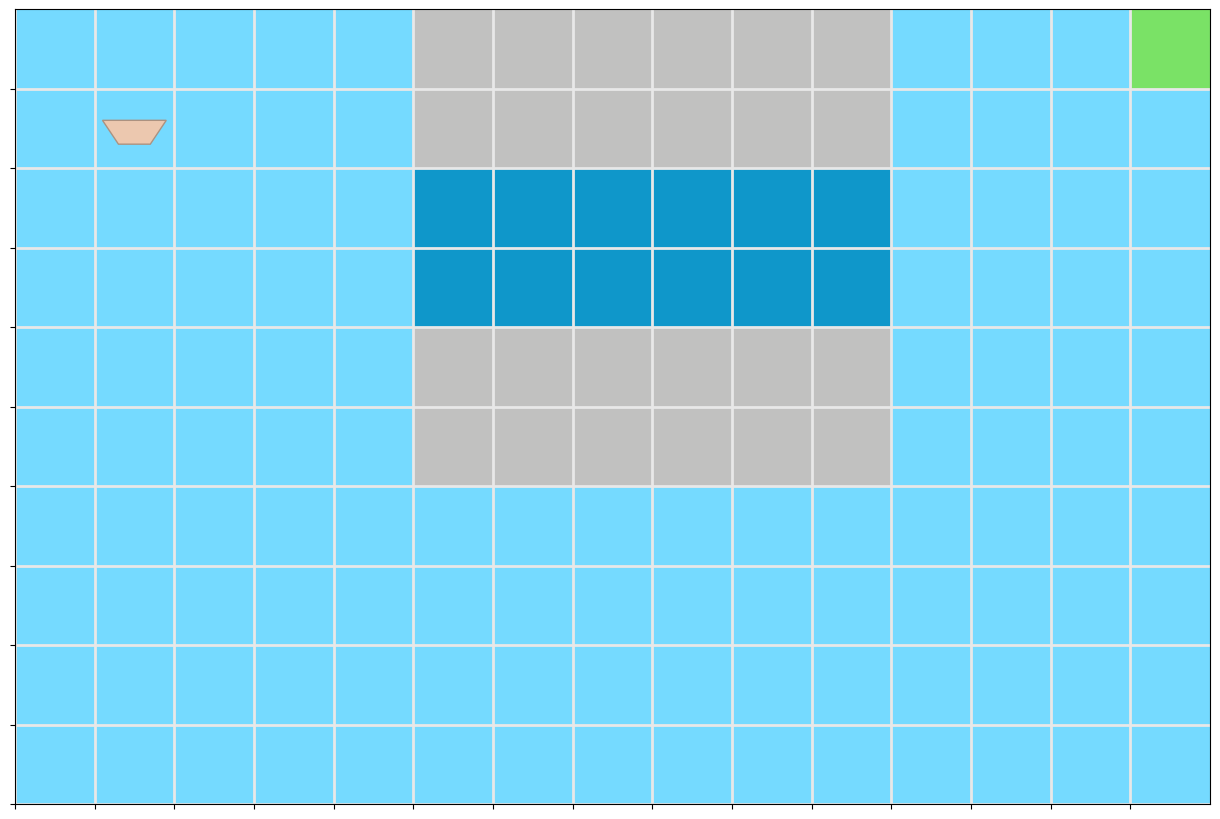

In [2]:
# Set up the environment
env = SailingGridworld(rock_penalty=-2, value_update_iter=100)

In [3]:
def get_values_policy(num_iterations=100, gamma=0.9, eps=1e-4, plot_values=False, filename='values.gif'):
    """
    Args:
        num_iterations: num of iterations to update the value function and policy
        gamma: discount factor used in value iteration
        eps: a tiny constant used to check the convergence of the value function and policy
        plot_values: if True, a GIF will be saved to plot state value functions and policy
        filename: filename of the saved value plot, if plot_value is True.
    Returns:
        updated v_est and policy, both are np.ndarray with shape (env.w, env.h)
    """
    
    # value table V_t, it stores the value at a position (x, y).
    
    v_est = np.zeros((env.w, env.h)) # env.w, env.h: width and height of the environment shown in Fig 1.
    # policy table pi_t, it stores the current action to take at a position (x, y)
    policy = np.zeros((env.w, env.h))

    for i in range(num_iterations):
       
        ########## Your code starts here ##########
        # TODO: Task 1, implement value iteration and retrive the resulting policy.
        #       In each iteration, update the state values v_est and policy with new values/policy.
        #       The v_est is updated according to the value iteration formula.
        # TODO: Task 2, check the convergence of the value function and policy.
        #       In each iteration, check the maximal absolute difference in successive v_est/policy,
        #       and compare it with eps, e.g., check the difference between v_est_i and v_est_i-1
        
        v_est_prev = np.copy(v_est)
        policy_prev = np.copy(policy)
        max_diff = 0  # Initialize the maximum difference
        
          # First, update all state values
        for x in range(env.w):
            for y in range(env.h):
                if x==15 and y==10:
                    break
                c = float("-inf")
                d = np.zeros(env.n_actions)
                for a in range(env.n_actions):
                    expected_value = 0

                    # Loop over transitions for the current action
                    for st, re, done, prob in env.transitions[x, y, a]:
                        if st is not None:
                            expected_value += prob * (re + 0.9 * v_est_prev[st[0], st[1]])

                    # Update the action with the maximum expected value
                    if expected_value > c:
                        c = expected_value
                    d[a] = expected_value
                # Update the state value with the maximum action value
                v_est[x, y] = c
                policy[x, y] = np.argmax(d)
        max_diff1 = np.max(np.abs(v_est - v_est_prev))
        max_diff2 = np.max(np.abs(policy - policy_prev)) 
        if  max_diff1 < eps:
            print(f"action Converged after {i + 1} iterations.")
            break
            
        if  max_diff2 < eps:
            print(f" policy Converged after {i + 1} iterations.")
            continue
            
            
    
    if plot_values:
        # Call env.record_values_policy function with your estimated state values and policy
        # to produce a GIF of the changing values. In our case, we only record the final state values and policy to save running time.
        # Call env.save_values_policy function to save the recorded GIF to filename.gif
        env.record_values_policy(v_est, policy)
        env.save_values_policy(filename=filename)

    return v_est, policy

In [4]:
# value iteration -- update value estimation and policy
value_est, policy = get_values_policy(num_iterations=100, gamma=0.9, eps=1e-4, plot_values=True, filename='T1_values.gif')

 policy Converged after 26 iterations.
 policy Converged after 28 iterations.
 policy Converged after 30 iterations.
 policy Converged after 32 iterations.
 policy Converged after 33 iterations.
 policy Converged after 34 iterations.
 policy Converged after 36 iterations.
 policy Converged after 37 iterations.
 policy Converged after 38 iterations.
action Converged after 39 iterations.


In [19]:
def eval_policy(policy, N=1, gamma=0.9, render=False, filename='env.gif'):
    """
    Args:
        policy: the policy to evaluate.
        N: number of evaluation episode. 
            e.g., N=10 means the policy is evaluated 10 times.
        gamma: discount factor to calculate the discounted_return.
        render: if True, a GIF of the policy's behavior will be saved.
        filename: filename to save the GIF file.
    Returns:
        mean and stddev of discounted_returns.
    """
    discounted_returns = np.empty((N,))
    # Eval policy
    for ep in range(N):
        state = env.reset()
        done = False
        steps = 0
        discounted_return = 0
        
        while not done:
           
            ########## You code starts here ##########

            # TODO: Use the policy to take the optimal action (Task 1)
            x,y = state
            action = policy[x,y]
            
            # Take a step in the environment
            next_state, reward, done, _ = env.step(action)
            steps += 1
            # TODO: Accumulate discounted return for this episode
            discounted_return += reward * np.power(gamma, steps)
            state = next_state
            ########## You code ends here ##########

            if render:
                env.render(filename=filename)
        # Record the discounted return for         
        discounted_returns[ep] = discounted_return
    mean_discounted_returns = np.mean(discounted_returns)
    std_discounted_returns = np.std(discounted_returns)
    print("The average discounted_returns:", mean_discounted_returns)
    print("The std_discounted_returns:", std_discounted_returns)
    return mean_discounted_returns, std_discounted_returns
                   

The average discounted_returns: 1.8530201888518416
The std_discounted_returns: 0.0


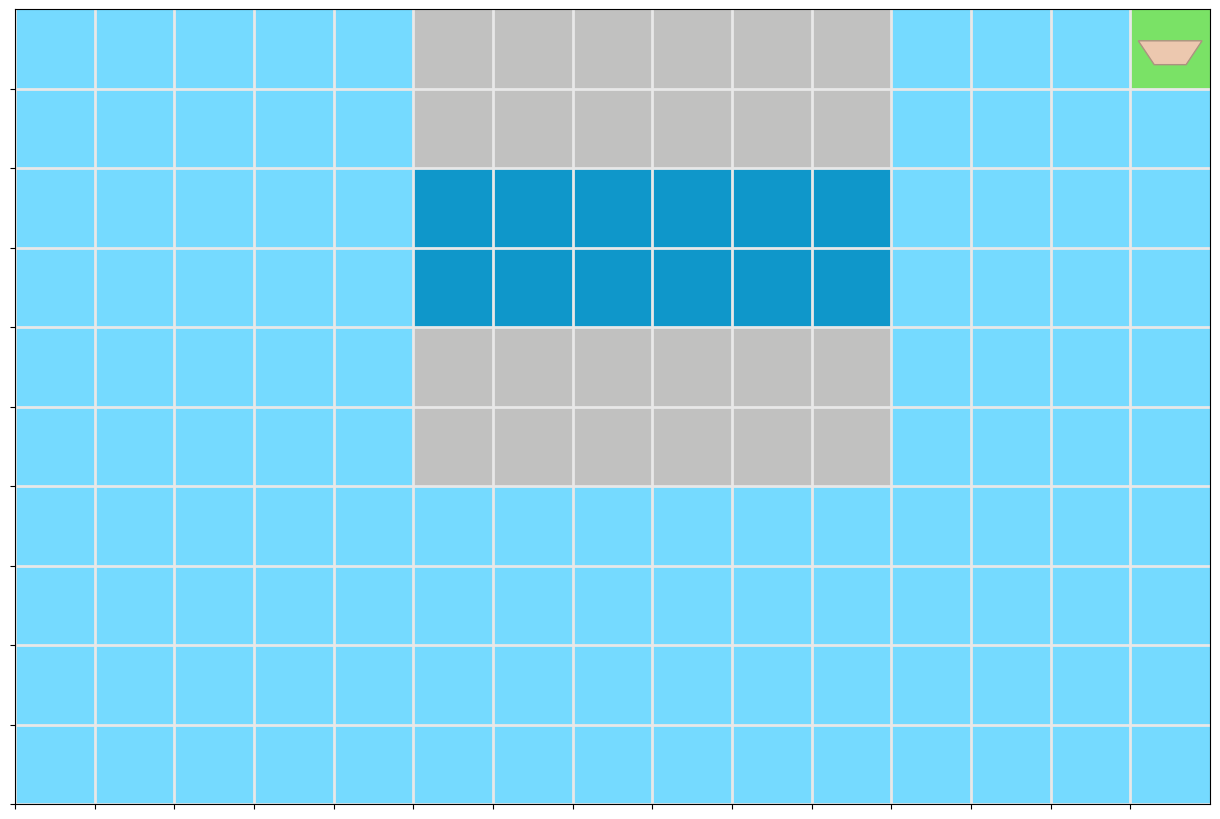

In [20]:
mean_discounted_returns, std_discounted_returns = eval_policy(policy=policy, N=1, gamma=0.9, render=True, filename='T1_eval.gif')

To see how the sailboat traverses the gridworld use this cell below to display the created gif:

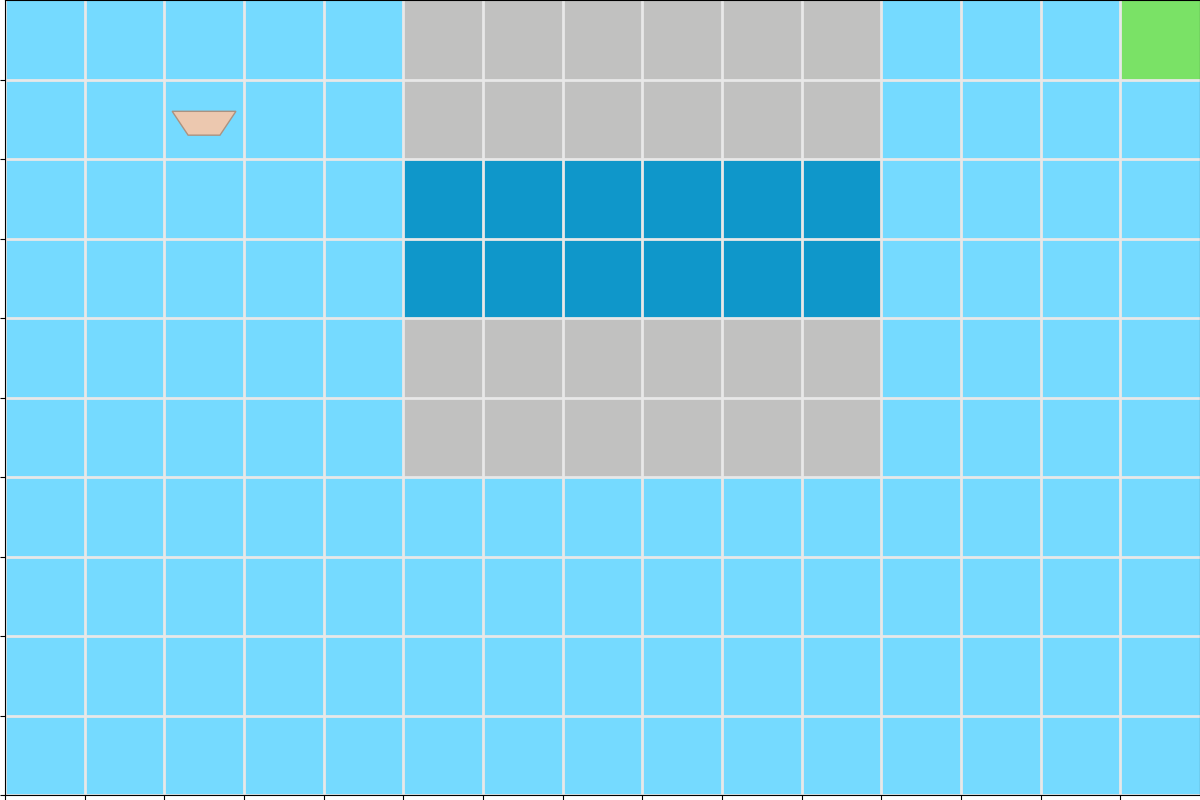

In [21]:
display(Image(data=open('T1_eval.gif','rb').read(), format='png'))

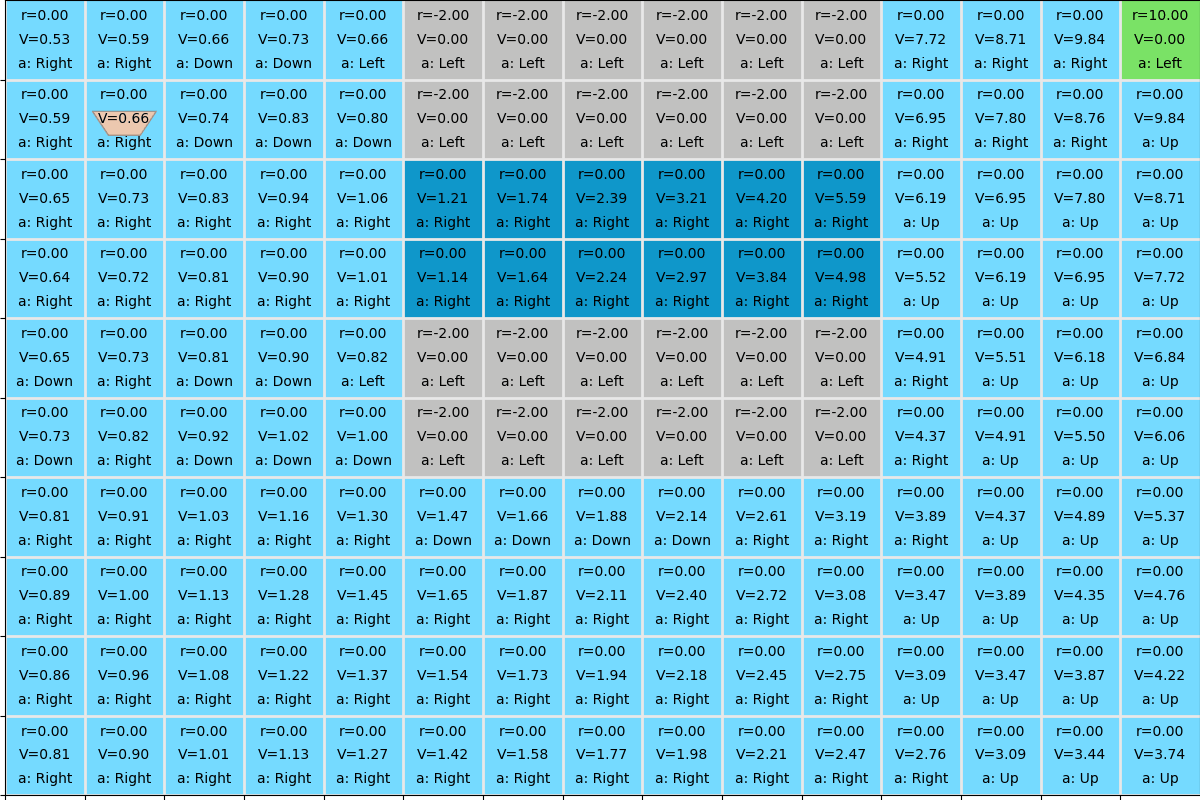

In [22]:
display(Image(data=open('T1_values.gif','rb').read(), format='png'))

In [23]:
# save value and policy
u.save_object({'value': value_est, 'policy': policy}, './value_policy.pkl')

<a id='Q1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.1</b> Reinforcement Learning Components (5 points) </h3> 

What is the agent and the environment in this sailor gridworld?
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


The agent: sailor,
The environment: sea area, rock area , random winds, narrow passage,harbour

<a id='Q2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.2</b> Value Analysis (5 points) </h3> 

What is the state value of the harbour and rock states? Why?
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


The state value of the harbour and the rock states are both zeor,because when the sailor reaches the rock, he will failed and the whole journey finished, so the learning will define it as useless statel. And the state of the harbour is considered as zero,because it's the final state and don't need to  think the next action. In this way, they help define the boundaries of the problem and indicate when an episode should terminate.

<a id='Q3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.3</b> Investigating Optimal Path (5 points) </h3> 

Which path did the sailor choose, the safe path below the rocks, or the dangerous path between the rocks? If you change the reward for hitting the rocks to -10 (that is, make the sailor value life more), does he still choose the same path?
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

 policy Converged after 30 iterations.
 policy Converged after 31 iterations.
 policy Converged after 32 iterations.
 policy Converged after 34 iterations.
 policy Converged after 35 iterations.
 policy Converged after 36 iterations.
 policy Converged after 37 iterations.
 policy Converged after 38 iterations.
 policy Converged after 39 iterations.
 policy Converged after 40 iterations.
 policy Converged after 41 iterations.
 policy Converged after 42 iterations.
action Converged after 43 iterations.
The average discounted_returns: 0.42391158275216234
The std_discounted_returns: 0.0


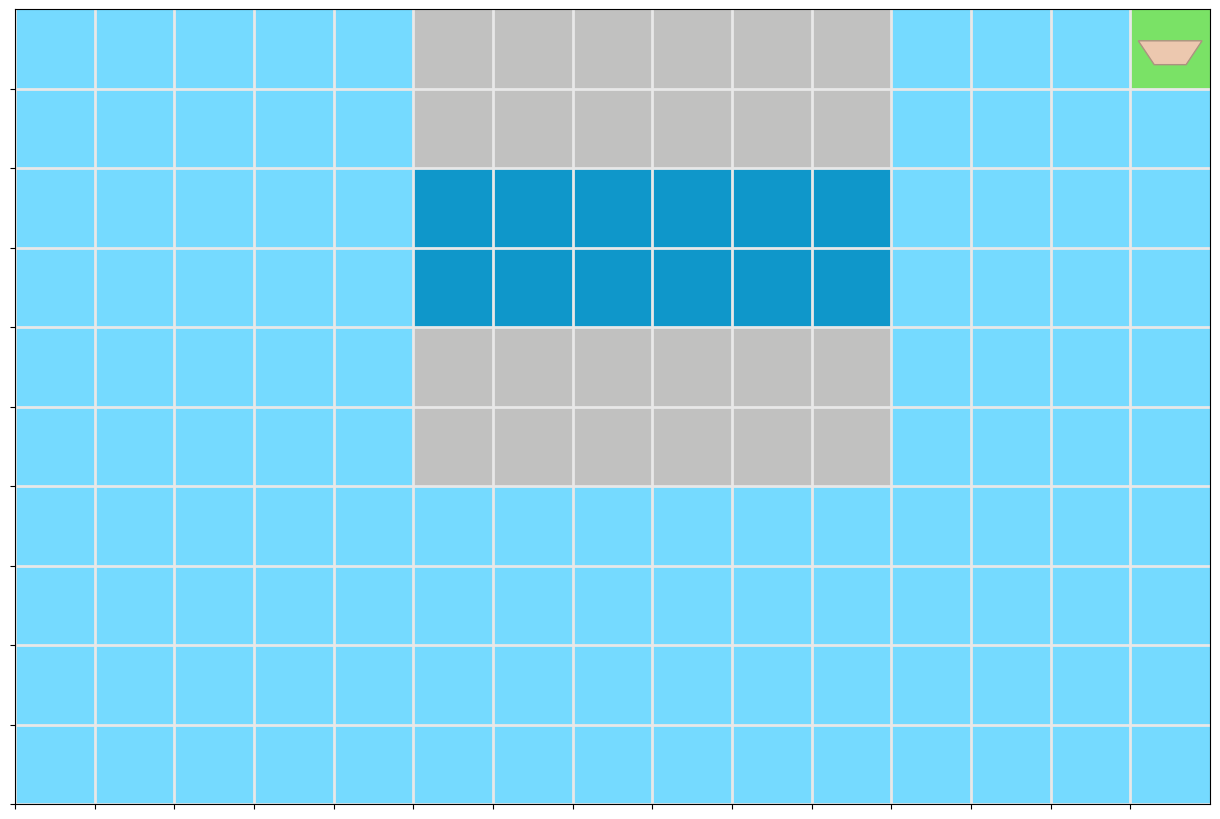

In [10]:
env = SailingGridworld(rock_penalty=-10, value_update_iter=100) # Set up env
value_est, policy = get_values_policy(num_iterations=100, gamma=0.9, eps=1e-4, plot_values=False) # Run value iteration
mean_discounted_returns, std_discounted_returns = eval_policy(policy=policy, N=1, gamma=0.9, render=True, filename='Q1_3.gif') # Evaluate policy

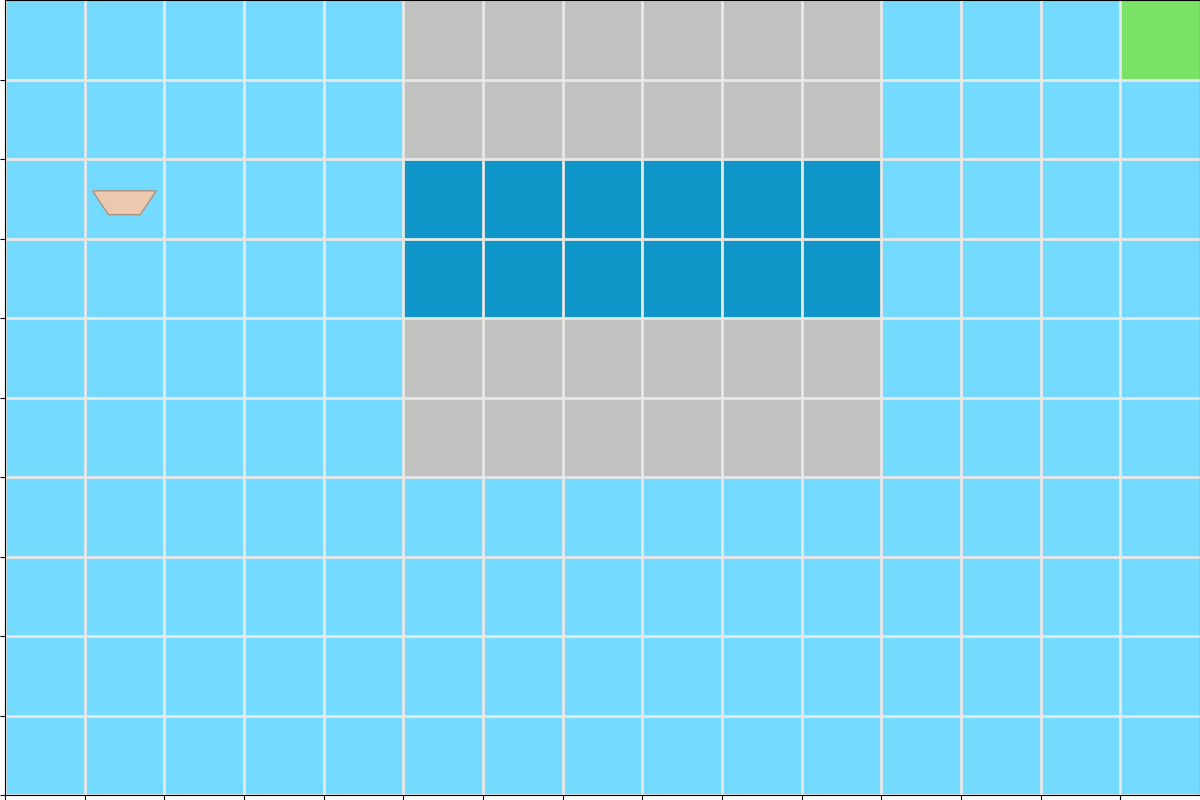

In [11]:
display(Image(data=open('Q1_3.gif','rb').read(), format='png'))

when the rock reward is -2, The sailor will more likely to choose the dangerous path below the rocks , it will reduce the time to the harbour,the prob is small ,you can afford the reward. when you set the rock reward is -10 ,the sailor will choose the safe path to the harbour,in this case,the sailor can get the stable reward and don't need to worry about the failure. so I thinke to balcance the optimal time and path,if the reward risk is big ,it will more likely to choose a stable route.

<a id='T2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 2.</b> Investigating Convergence Properties (15 points) </h3> 

What happens if you run the algorithm for 30 iterations? Do the value function and policy still converge? For the value function, you can assume they have converged
if the maximum change in value is lower than a certain threshold $\epsilon = 10^{-4}$:
$$
\max _s\left|V_k(s)-V_{k-1}(s)\right|<\epsilon
$$

where $V_k(s)$ is the estimated value of state $s$ in $k$-th iteration of the algorithm.
Generally, **which of them** - the policy or value function - needs less iterations to converge, if any? **Justify your answer**.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


 policy Converged after 30 iterations.


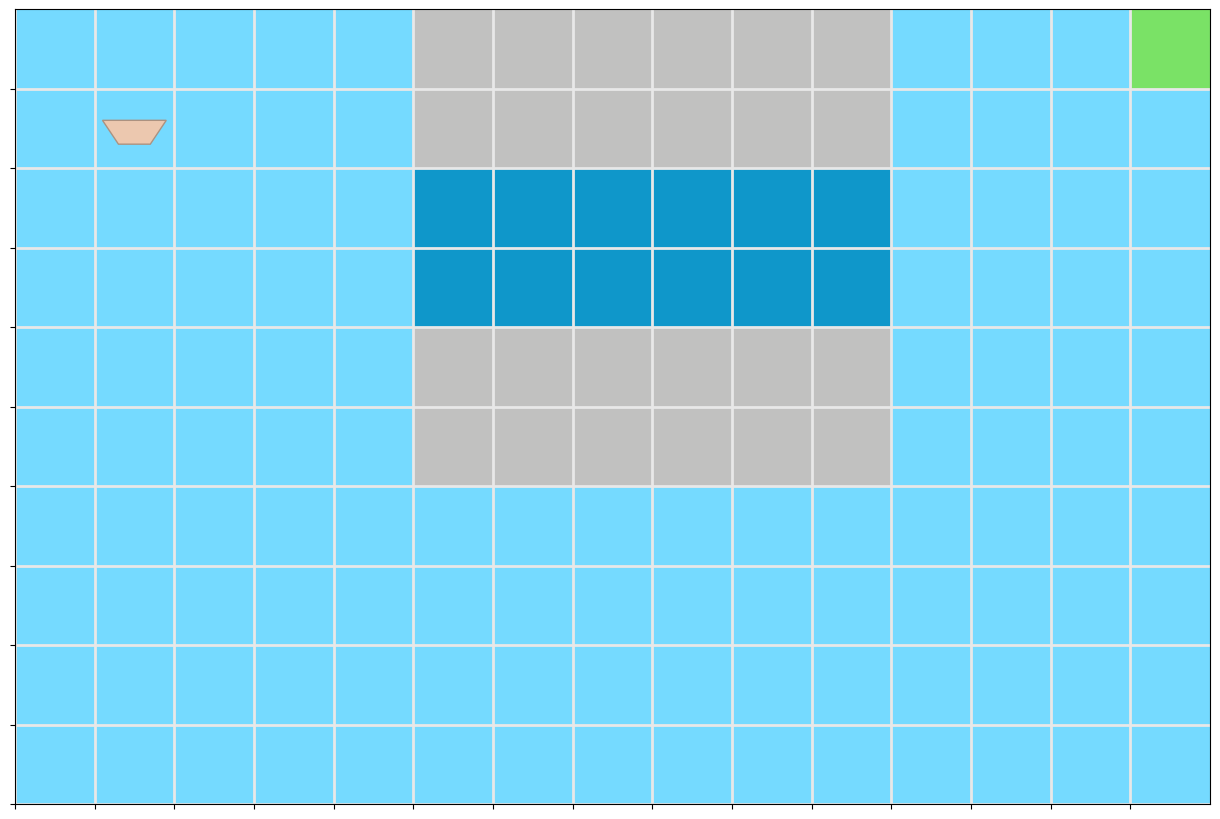

In [12]:
env = SailingGridworld(rock_penalty=-10, value_update_iter=30) # Set up env
value_est, policy = get_values_policy(num_iterations=30, gamma=0.9, eps=1e-4, plot_values=False) # Run value iteration

I found the policy needs less iterations to converage, In your situation,the policy converaged after 30 iterations. I write the max_diff in the get_values_policy to see the number of the iterations needed for the actions and policy. 

<a id='T3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 3.</b> Number of Iterations Until Convergence (5 points) </h3> 

Set the reward for crashing into the rocks back to -2. Change the termination condition of your algorithm to make it run until convergence. **Report the number of iterations required for the value function to converge.**
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

 policy Converged after 26 iterations.
 policy Converged after 28 iterations.
 policy Converged after 30 iterations.
 policy Converged after 32 iterations.
 policy Converged after 33 iterations.
 policy Converged after 34 iterations.
 policy Converged after 36 iterations.
 policy Converged after 37 iterations.
 policy Converged after 38 iterations.
action Converged after 39 iterations.


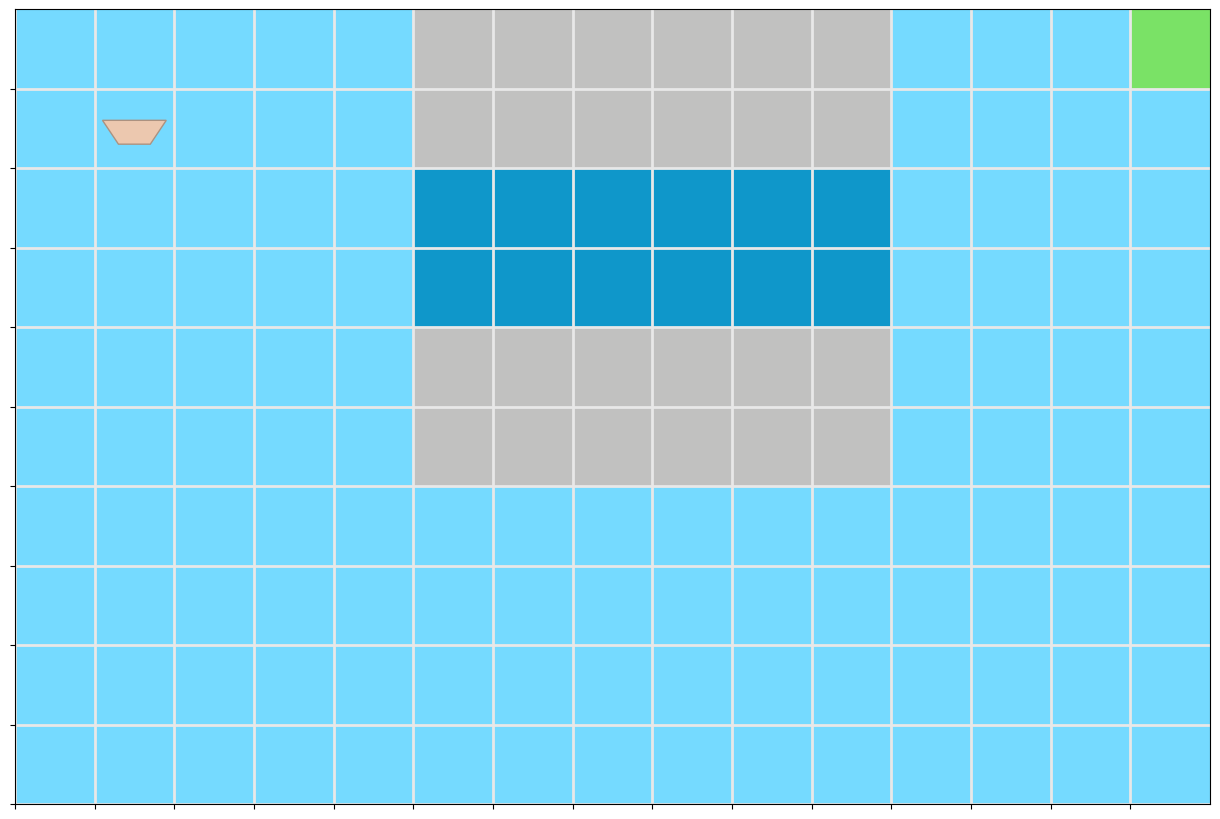

In [13]:
env = SailingGridworld(rock_penalty=-2, value_update_iter=100) # Set up env
value_est, policy = get_values_policy(num_iterations=100, gamma=0.9, eps=1e-4, plot_values=False) # Run value iteration

The number of iterations required for the value function to converge is 39

<a id='T4'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 4.</b> Evaluating the Policy (10 points) </h3> 

Evaluate your learned policy for N = 800 episodes, and compute the discounted return of the initial state, see [1] Eq. (3.8), for each episode. The reward for crashing into rocks must be kept at -2 for this exercise. **Report the average and standard deviation of the initial state’s discounted return over the N=800 episodes.**
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

 policy Converged after 26 iterations.
 policy Converged after 28 iterations.
 policy Converged after 30 iterations.
 policy Converged after 32 iterations.
 policy Converged after 33 iterations.
 policy Converged after 34 iterations.
 policy Converged after 36 iterations.
 policy Converged after 37 iterations.
 policy Converged after 38 iterations.
action Converged after 39 iterations.
The average discounted_returns: 0.549870597129532
The std_discounted_returns: 1.2415491198904436


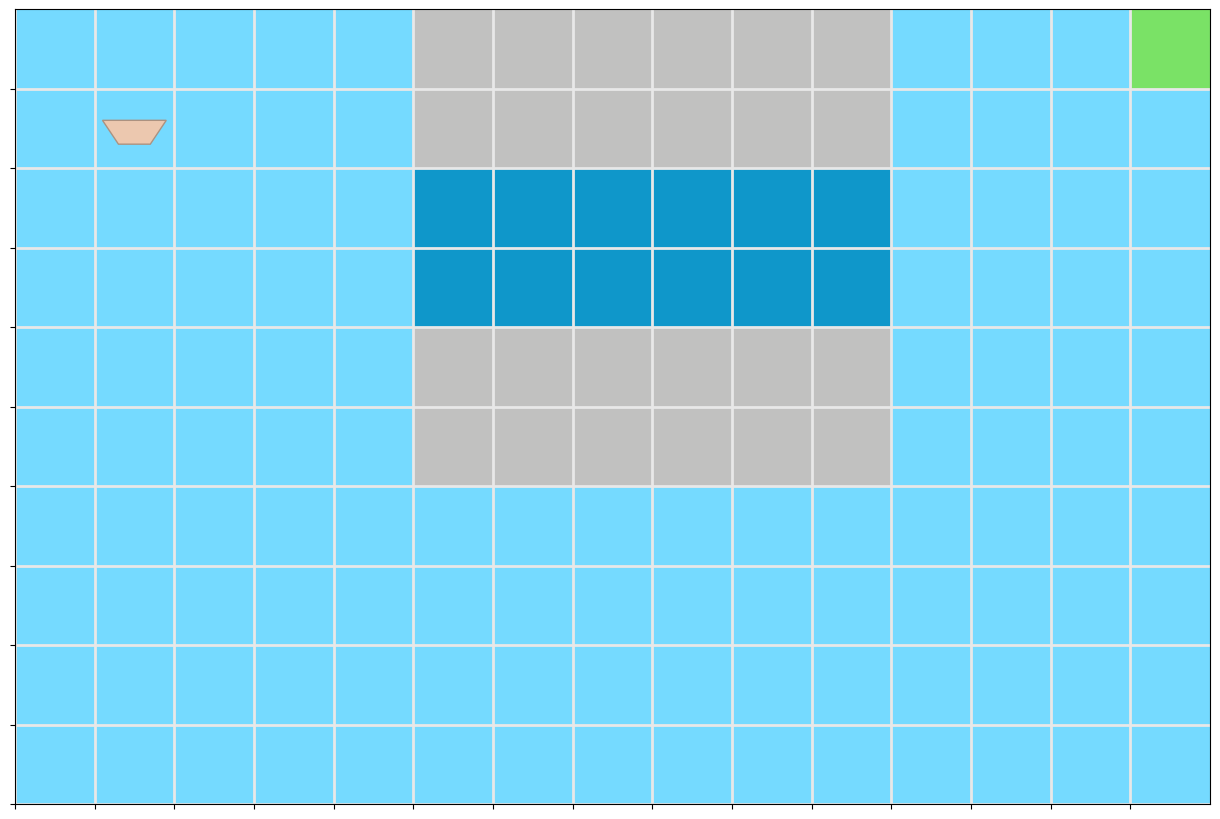

In [14]:
env = SailingGridworld(rock_penalty=-2, value_update_iter=100) # Set up env
value_est, policy = get_values_policy(num_iterations=100, gamma=0.9, eps=1e-4, plot_values=False) # Run value iteration
mean_discounted_returns, std_discounted_returns = eval_policy(policy=policy, N=800, gamma=0.9)

DOUBLE CLICK HERE TO EDIT, CLEAR THIS TEXT AND REPORT HERE

<a id='Q4'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.1</b> Relationship Between Discounted Return and the Value Function (10 points) </h3> 

What is the relationship between the discounted return and the value function? Explain briefly.

            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

v<sub>&pi;</sub>(s) = E<sub>&pi;</sub>[G<sub>t</sub>|S<sub>t</sub> = s]
The value function of a state "s" under a policy "π," denoted as "vπ(s)," represents the expected sum of discounted rewards an agent can obtain if it starts in state "s" and then follows the policy "π" thereafter.

<a id='Q5'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.2</b> Considering Unknown Environments (15 points) </h3> 

Imagine a reinforcement learning problem involving a robot exploring an ***unknown*** environment. Could the ***value iteration*** **approach used in this exercise** be applied **directly** to that problem? Why/why not? Which assumptions are unrealistic, if any?
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Certainly not. This is primarily due to the constraints we face in our practical applications, such as limited environmental space and a restricted set of actions available. What's even more critical is that in a more real-world scenario, the process of calculating the values of different states, similar to what we did in this exercise, would significantly escalate the computational demands. My code employs numerous for loops, which can be extremely time-consuming and computationally intensive when dealing with a large number of states. Moreover, the exercise conveniently presents a clear and abstract representation of various states and behaviors, but translating this complexity into real-world application problems can be exceptionally challenging.


# 4. Submitting <a id='4.'></a>
Ensure all tasks and questions (in ```ex2.ipynb```) are answered and the relevant plots are recorded in the relevant places. Details about attaching images and figures can be found below. The relevant graphs to be included for this assignment are:
- Task 1, image of estimated state values

Ensure the correct model files are saved:
- Task1, ensure ```value_policy.pkl``` file for the state values and the policy in Task 1 are included.

## 4.1 Feedback <a id='4.1'></a>
In order to help the staff of the course as well as the forthcoming students, it would be great if you could answer feedback questionnaire in ```feedback.ipynb```

Please use the following section to record references.
# References <a id='5.'></a>

[1] Sutton R S, Barto A G. Reinforcement learning: An introduction[M]. MIT press, 2018.